### TASK 1

Following code snippet visualizes the original-data points.


100


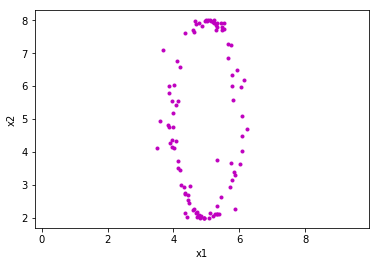

In [179]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x1=[]
x2=[]

with open("data.txt", 'r') as f:
    data = f.readlines()
for line in data:
    points=line.split()
    x1.append(points[0])
    x2.append(points[1])
    plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')
print(l)
plt.plot(x1,x2, '.m')

### TASK 2

First if we neglect the noise in the data for a moment , it is evident that these data points satisfy the following elliptic equation,

$$(x-5)^2+\frac{(y-5)^2}{9} = 1$$
                                    

According to this equation 

$$y=5\pm \sqrt{9-9\cdot(x-5)^2}$$

So what we could to to generate a similar dataset is to choose random $x_1$ values unfiromly and calculate the $x_2$ values. Here my guess is data is distributed uniformly over the ellipse, that is why $x_1$ is chosen uniformly. Here for each $x_1$ coordinate, $x_2$ can take two different values depending on the sign of the square root. Therefore we could also choose the sign randomly for each $x_2$. 

I propose the folowing generative model, 
$$k= \sim \mathcal U(4,6)$$

$$x_1= k+ \frac{\epsilon_1}{10}$$

$$x_2=5+ sign\cdot \sqrt{9-9\cdot(k-5)^2} -sign\cdot \frac{\epsilon_2}{5}$$

$$\epsilon_1 \sim \mathcal{N}(x;0,1)$$

$$\epsilon_2 \sim \mathcal{U}(x;0,1)$$

$$sign \in[-1;\frac{1}{2},1;\frac{1}{2}] $$

I deliberately choose $\epsilon_1$ from normal distribution and $\epsilon_2$ from uniform distribution since it seems there is no outward noise in $x_2$ and so noise should be given according to sign of the square root term. 

### TASK 3

The following code snippet is the implementation of the proposed generative model.

In [175]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100                                                 #Number of data-points
k=2*np.random.rand(N)+4                                 #Generate kernel.
epsilon1=np.random.randn(N)                             #Noise for x1
epsilon2=np.random.rand(N)                              #Noise for x2
x1=k+epsilon1/10                                        #Compute x1
sign=np.sign(np.random.randn(N));                       #For each x1, there are two possible x2 points. Choose one.
x2=5+sign*np.sqrt(9*(1-(k-5)**2))-sign*epsilon2/5;      #Compute x2.


print("x = ",x1,"\n y = ",x2)


x =  [ 5.91944827  4.43401075  4.75792759  4.09333164  5.25705845  5.96992173
  4.5382771   4.99381359  5.76572738  4.6509288   5.62092969  5.45543999
  4.13339232  4.18081586  5.38425413  4.18704321  5.69386144  5.19127846
  5.44686278  4.85587581  4.94870916  5.0835376   4.63284141  4.33145206
  4.17936395  4.29222249  4.03253914  5.55671222  4.02513512  5.04002409
  4.09270062  4.35339188  4.70483822  4.9094578   4.62316033  5.18141231
  4.02249534  4.46969229  4.27398297  5.60693232  5.91825201  4.6945083
  3.99523102  4.36623867  5.69912392  5.56835232  5.05486697  5.09316239
  5.03182903  4.35444178  5.71362236  4.8451373   4.50267994  5.2481796
  5.74400567  4.71590401  4.59752382  4.18931932  4.49453957  5.40420767
  4.89875369  5.84303752  5.21839038  5.40638946  4.33627051  5.23836178
  4.83871461  4.36213134  4.89145248  4.02749935  4.50751349  4.25408528
  5.63711074  5.91649605  4.7718619   5.56427317  5.4476854   4.83946745
  4.6960169   5.60465199  4.8741247   5.76145814

### TASK 4

Following code snippet visualizes the dataset generated by our proposed genrative model.

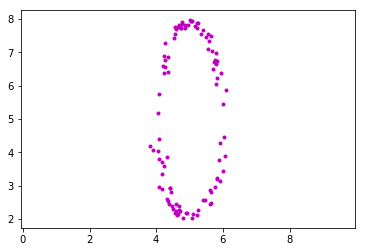

In [178]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100                                                 #Number of data-points
k=2*np.random.rand(N)+4                                 #Generate kernel.
epsilon1=np.random.randn(N)                             #Noise for x1
epsilon2=np.random.rand(N)                              #Noise for x2
x1=k+epsilon1/10                                        #Compute x1
sign=np.sign(np.random.randn(N));                       #For each x1, there are two possible x2 points. Choose one.
x2=5+sign*np.sqrt(9*(1-(k-5)**2))-sign*epsilon2/5;      #Compute x2.


plt.axis('equal')

plt.plot(x1,x2, '.m')

### TASK 5


1. We could compare the statistical parameters of the datasets such as mean and correlation. If the mean of both datasets are far away from each other, this could be implication of the fact that datapoints are not close to each other. However if means are very close, we cannot immediately come to conclusion that datasets are similar. We need further investigation. We may compare the correlations to get an idea about how the components of the data are correlated in the both dataset. If for one dataset correlation is positive, and negative for the other this could imply that the points are likely drawn from different sample populations because they don't behave similar. Of course there is always noise in the data which forces us to be less strict to make such a decision. Therefore noise removal could be useful for task requring higher accuracy levels.   

2. If we want to make binary judgements, similar or not similar, we can first hypothesize that these two datasets are drawn from the same sample population. Then we can calculate a confidence interval for some statistical parameters such as difference of the means or proportion of variances. If the confidence interval is satisfying our accuracy we can say that these datasets are similar, otherwise we say it is not similar.

3. Developing machine learning classifier algorithms, we can classify the datasets using a specific criterion. If the dataasets fall into same class, we can say that they are similar.  
